In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import time

In [2]:
def read_images(folder_path):
    
    folders = [folder_path + "/horses", folder_path + "/humans"]

    images = []
    labels = []

    #Reading images and saving into the images array
    for counter, folder in enumerate(folders):
        for file in os.listdir(folder):
            img = tf.keras.preprocessing.image.load_img(os.path.join(folder, file))
            img_array = keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(counter) # 0 is horse and 1 is human
    
    images = np.array(images)
    images = tf.keras.utils.normalize(images)

    labels = np.array(labels)

    #Shuffle all the data not to keep well separeted
    ts = int(time.time())
    np.random.seed(ts)
    np.random.shuffle(images)
    np.random.seed(ts)
    np.random.shuffle(labels)

    return images, labels
    

In [3]:
#data_set = read_images("C:/Users/mathe/OneDrive/Área de Trabalho/iniciacao_cientifica/Classificacao_de_bases/human_or_horses/dataset/train")
x_dataset, y_dataset = read_images("dataset/train")

In [4]:
x_test, y_test = read_images("dataset/teste")

In [5]:
model = keras.models.Sequential()

#layers.Conv2D(Number_of_filters, (filter_width, filter_heigth)
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

#Adding Dense Layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(2))

In [6]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = "best_model.h5", 
    monitor = 'val_accuracy', 
    save_best_only = True, 
    mode = 'max',
    save_weights_only = False,
    verbose = 1    
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)


In [7]:
history = model.fit(x_dataset, y_dataset, epochs=7, validation_data=(x_test, y_test), callbacks=[checkpoint])

Epoch 1/7
33/33 [==============================] - ETA: 0s - loss: 0.5719 - accuracy: 0.7069
Epoch 1: val_accuracy improved from -inf to 0.56250, saving model to best_model.h5
33/33 [==============================] - 112s 3s/step - loss: 0.5719 - accuracy: 0.7069 - val_loss: 0.6297 - val_accuracy: 0.5625
Epoch 2/7
33/33 [==============================] - ETA: 0s - loss: 0.2391 - accuracy: 0.9075
Epoch 2: val_accuracy improved from 0.56250 to 0.87891, saving model to best_model.h5
33/33 [==============================] - 107s 3s/step - loss: 0.2391 - accuracy: 0.9075 - val_loss: 0.3441 - val_accuracy: 0.8789
Epoch 3/7
33/33 [==============================] - ETA: 0s - loss: 0.1213 - accuracy: 0.9503
Epoch 3: val_accuracy improved from 0.87891 to 0.89844, saving model to best_model.h5
33/33 [==============================] - 111s 3s/step - loss: 0.1213 - accuracy: 0.9503 - val_loss: 0.3449 - val_accuracy: 0.8984
Epoch 4/7
33/33 [==============================] - ETA: 0s - loss: 0.0535 - 

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1) 
print('Test accuracy:', test_acc)

8/8 [==============================] - 7s 890ms/step - loss: 0.2935 - accuracy: 0.9219
Test accuracy: 0.921875


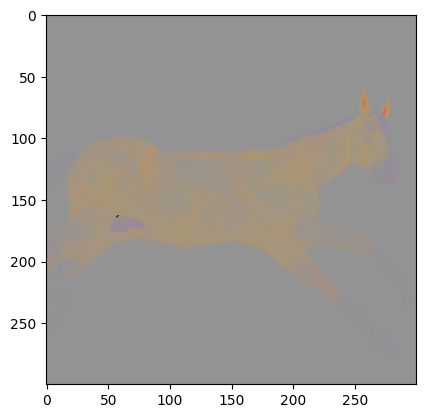

1/1 [==============================] - 0s 72ms/step

Resultado encontrado:  Horse
Resultado esperado:  Horse 



In [17]:
result_label = ["Horse", "Human"]

index = 250

image = x_test[index].reshape(1,300,300,3)

plt.figure()
plt.imshow(image[0])
plt.show
plt.pause(0.001)

prediction = model.predict(image)

print("\nResultado encontrado: ", result_label[np.argmax(prediction)])
print("Resultado esperado: ", result_label[int(y_test[index])], "\n")


In [18]:
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)

# model.save_weights("model.h5")
# print("Saved model to disk")

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)